In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
df = pd.read_csv("used_cars_data.csv")
df.head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [34]:
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [35]:
df.shape

(7253, 14)

In [36]:
num_col = df.select_dtypes(include="number").columns.tolist()
num_col


['S.No.', 'Year', 'Kilometers_Driven', 'Seats', 'Price']

In [37]:
cat_col = df.select_dtypes(include=["object", "category"]).columns
cat_col

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price'],
      dtype='object')

In [38]:
df.set_index("S.No.",inplace=True)
df.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20


In [39]:
# check null
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [46]:
# imputing null values
df["Mileage"].fillna(df["Mileage"].mode()[0],inplace=True)
df["Engine"].fillna(df["Engine"].mode()[0],inplace=True)
df["Power"].fillna(df["Power"].mode()[0],inplace=True)
df["Seats"].fillna(df["Seats"].mode()[0],inplace=True)
df["Price"].fillna(df["Price"].mean(),inplace=True)
df.isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14428\674440932.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Seats"].fillna(df["Seats"].mode()[0],inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14428\674440932.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            6247
Price                   0
dtype: int64

In [41]:
d = df.duplicated()
print(df[d].count())

Name                 1
Location             1
Year                 1
Kilometers_Driven    1
Fuel_Type            1
Transmission         1
Owner_Type           1
Mileage              1
Engine               1
Power                1
Seats                1
New_Price            0
Price                0
dtype: int64


In [ ]:
df.drop("New_Price",axis=1,inplace=True)


Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

<Axes: ylabel='Price'>

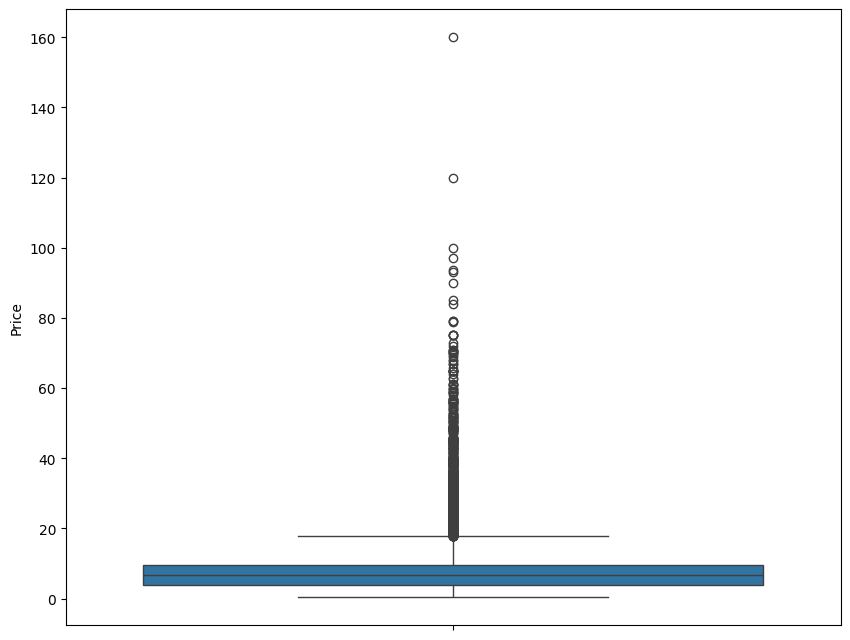

In [64]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df["Price"])

In [65]:
# remove outlier
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_outlier = df[(df["Price"]>=lower_bound) & (df["Price"]<=upper_bound)]
print(df_outlier)

                                                    Name    Location  Year  \
S.No.                                                                        
0                                 Maruti Wagon R LXI CNG      Mumbai  2010   
1                       Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2                                           Honda Jazz V     Chennai  2011   
3                                      Maruti Ertiga VDI     Chennai  2012   
4                        Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...                                                  ...         ...   ...   
7248                   Volkswagen Vento Diesel Trendline   Hyderabad  2011   
7249                              Volkswagen Polo GT TSI      Mumbai  2015   
7250                              Nissan Micra Diesel XV     Kolkata  2012   
7251                              Volkswagen Polo GT TSI        Pune  2013   
7252   Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       K

<Axes: ylabel='Price'>

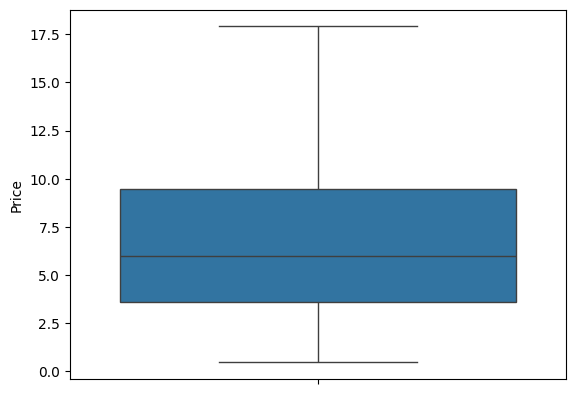

In [66]:
sns.boxplot(data=df_outlier["Price"])

In [68]:
df.groupby("Transmission")["Price"].mean()

Transmission
Automatic    18.179783
Manual        6.053845
Name: Price, dtype: float64

In [73]:
df.groupby("Fuel_Type")["Location"].count()

Fuel_Type
CNG           62
Diesel      3852
Electric       2
LPG           12
Petrol      3325
Name: Location, dtype: int64

In [75]:
c1 = pd.crosstab(df["Location"],df["Fuel_Type"],margins=True)
c1

Fuel_Type,CNG,Diesel,Electric,LPG,Petrol,All
Location,,,,,,
Ahmedabad,3,169,0,0,103,275
Bangalore,1,273,0,0,166,440
Chennai,2,341,1,0,247,591
Coimbatore,0,430,0,0,342,772
Delhi,12,361,0,0,287,660
Hyderabad,3,593,0,6,274,876
Jaipur,0,276,0,4,219,499
Kochi,9,358,0,0,405,772
Kolkata,1,316,0,0,337,654


In [80]:
c2 = pd.crosstab(df["Location"],df["Transmission"],df["Price"],aggfunc="mean")
c2

Transmission,Automatic,Manual
Location,,
Ahmedabad,15.406841,6.249263
Bangalore,21.351851,6.616801
Chennai,16.444055,5.523971
Coimbatore,23.474621,8.030165
Delhi,18.320551,5.801560
Hyderabad,19.452633,6.228941
Jaipur,13.566043,5.431006
Kochi,19.773832,6.793315
Kolkata,14.957679,5.018606


In [82]:
c3 = pd.crosstab(df["Fuel_Type"],df["Transmission"])
c3

Transmission,Automatic,Manual
Fuel_Type,,
CNG,0,62
Diesel,1317,2535
Electric,2,0
LPG,0,12
Petrol,730,2595


In [83]:
p1 = pd.pivot_table(data=df,index="Location",values="Kilometers_Driven",aggfunc="mean")
p1

,Kilometers_Driven
Location,
Ahmedabad,55272.250909
Bangalore,57181.631818
Chennai,87688.282572
Coimbatore,47030.866580
Delhi,56569.972727
Hyderabad,70239.702055
Jaipur,72144.729459
Kochi,45407.002591
Kolkata,43529.912844


In [84]:
p2 = pd.pivot_table(data=df,index="Location",values="Transmission",columns="Fuel_Type",aggfunc="count")
p2

Fuel_Type,CNG,Diesel,Electric,LPG,Petrol
Location,,,,,
Ahmedabad,3.0,169.0,NaN,NaN,103.0
Bangalore,1.0,273.0,NaN,NaN,166.0
Chennai,2.0,341.0,1.0,NaN,247.0
Coimbatore,NaN,430.0,NaN,NaN,342.0
Delhi,12.0,361.0,NaN,NaN,287.0
Hyderabad,3.0,593.0,NaN,6.0,274.0
Jaipur,NaN,276.0,NaN,4.0,219.0
Kochi,9.0,358.0,NaN,NaN,405.0
Kolkata,1.0,316.0,NaN,NaN,337.0


In [85]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
S.No.,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


<Axes: xlabel='Year', ylabel='Count'>

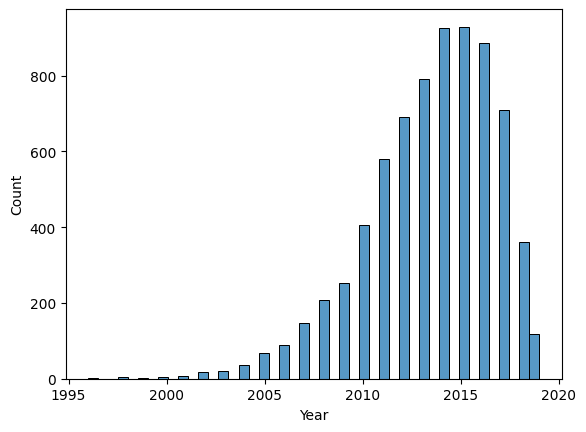

In [89]:
sns.histplot(data=df,x="Year")

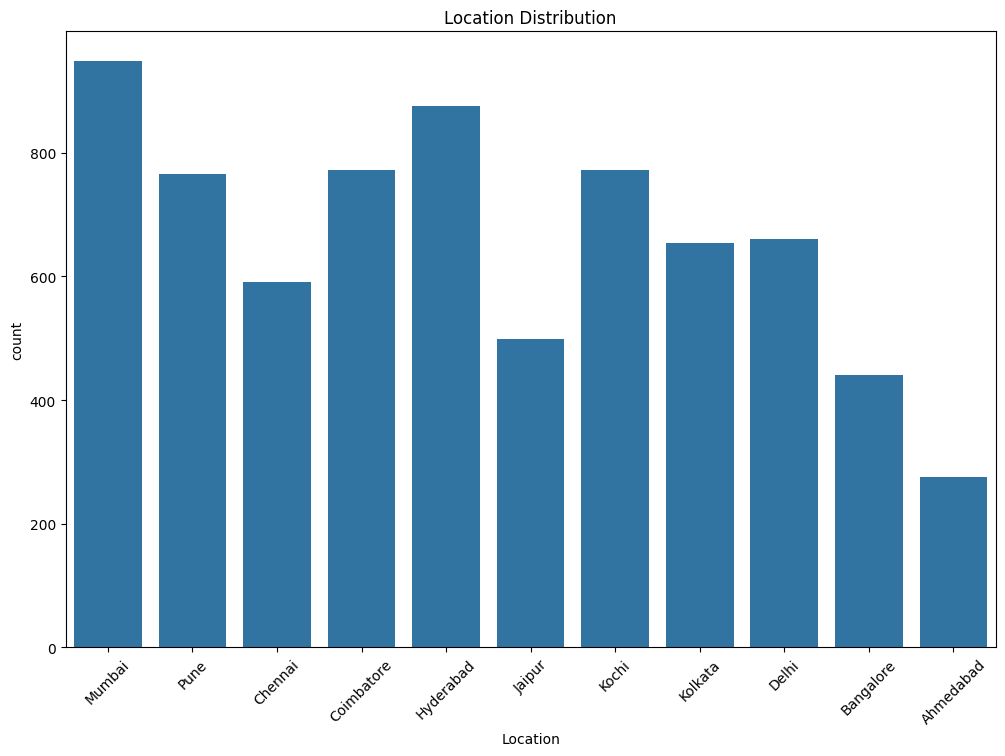

In [94]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x="Location")
plt.title("Location Distribution")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Fuel Type Distribution')

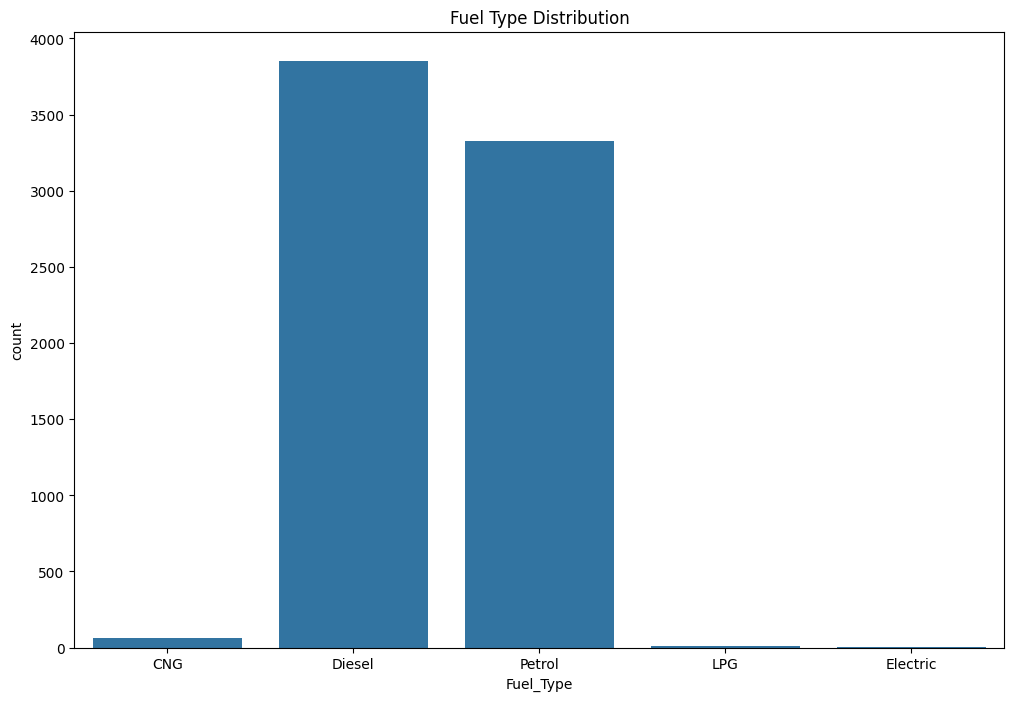

In [98]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x="Fuel_Type")
plt.title("Fuel Type Distribution")


Text(0.5, 1.0, 'Transmission Distribution')

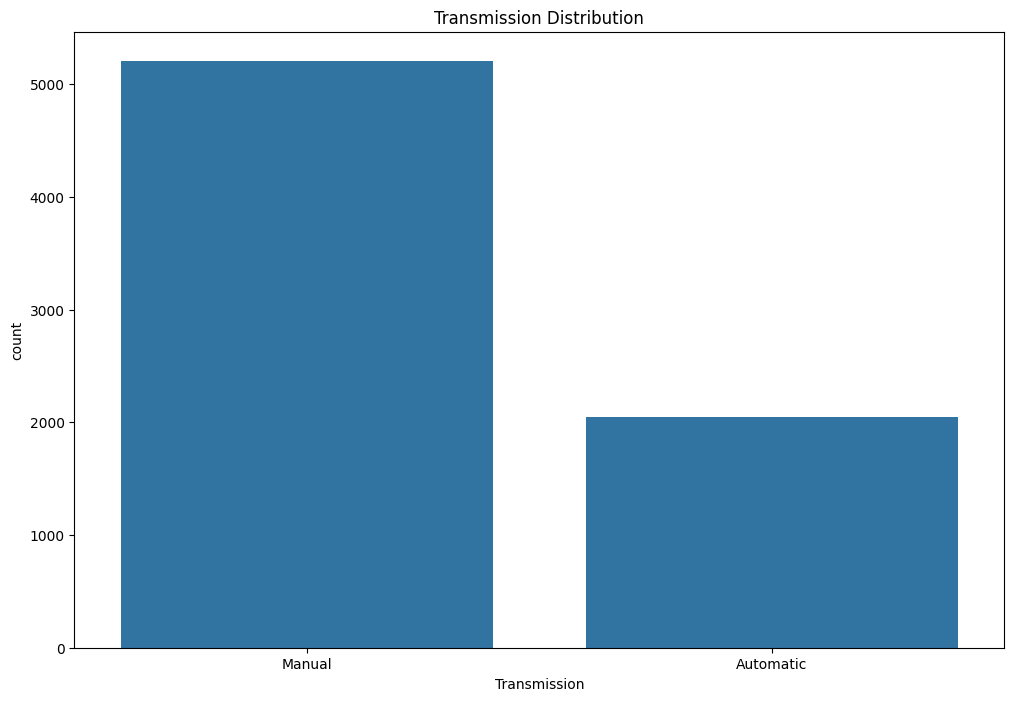

In [97]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x="Transmission")
plt.title("Transmission Distribution")


<Axes: xlabel='Fuel_Type', ylabel='Kilometers_Driven'>

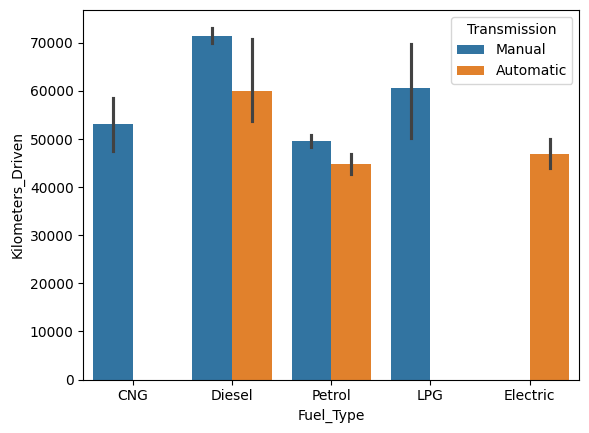

In [106]:
sns.barplot(data=df,x="Fuel_Type",y="Kilometers_Driven",hue="Transmission")

<Axes: xlabel='Year', ylabel='Price'>

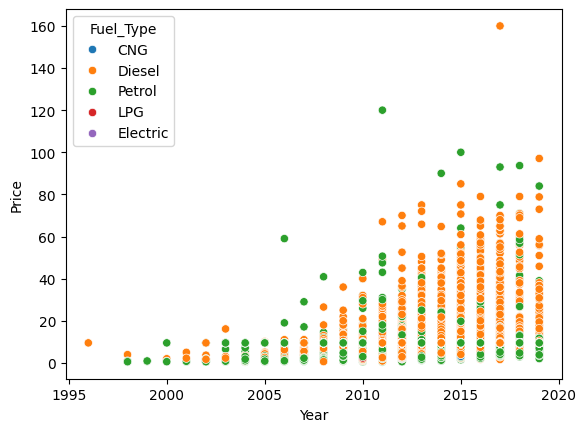

In [116]:
sns.scatterplot(data=df,x="Year",y="Price",hue="Fuel_Type")

<Axes: xlabel='Seats', ylabel='Price'>

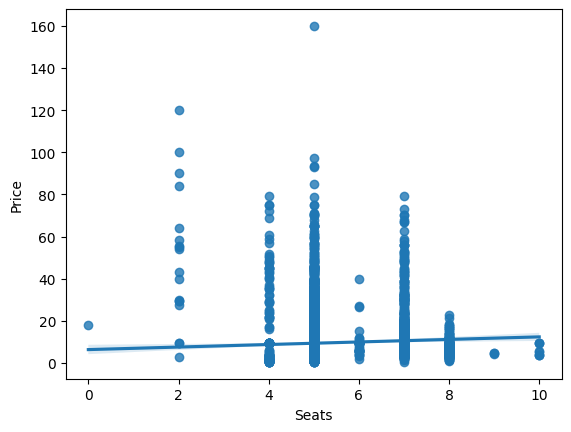

In [120]:
sns.regplot(data=df,x="Seats",y="Price")

<Axes: >

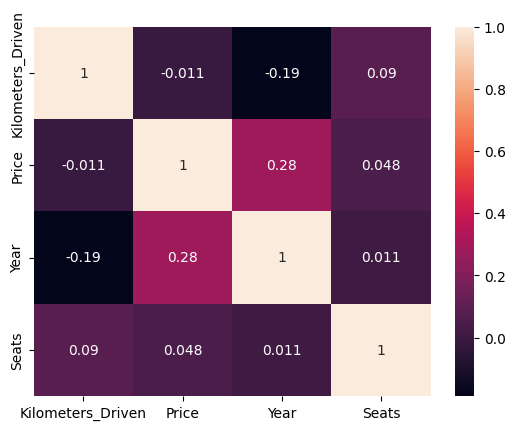

In [113]:
col = df[["Kilometers_Driven","Price","Year","Seats"]]
sns.heatmap(data=col.corr(),annot=True)